In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [30]:
dataset = 'GreenGenes'
metric = 'hamming'
max_depth = 30

In [31]:
raw_data = pd.read_csv(
    f'logs/info_{metric}_{max_depth}.csv',
    dtype={
        'cluster_name': str,
        'number_of_points': int,
        'center': int,
        'radius': np.float64,
        'lfd': np.float64,
        'is_leaf': bool,
    }
)
raw_data['cluster_name'][0] = ''
raw_data = raw_data.fillna(0.0)
raw_data['depth'] = list(map(len, raw_data.cluster_name.values))
raw_data.head()

/home/nishaq/Documents/research/CHESS/.chess/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,cluster_name,number_of_points,center,radius,lfd,is_leaf,depth
0,,1017383,864757,0.104009,864757.000000,False,0
1,0,14293,639336,0.101406,639336.000000,False,1
2,00,8177,639108,0.067300,1.064772,False,2
3,000,1453,684824,0.064697,1.681452,False,3
4,0000,554,684783,0.061312,1.923918,False,4


In [32]:
leaves = list(raw_data[raw_data.is_leaf == True].cluster_name.values)
print(len(leaves))

110411


In [33]:
tree_depth = max(raw_data.depth.values)
max_lfd = max(raw_data.lfd.values)
print(tree_depth, max_lfd)

30 870064.0


In [34]:
raw_data.describe()

,number_of_points,center,radius,lfd,depth
count,2.208210e+05,2.208210e+05,220821.000000,220821.000000,220821.000000
mean,1.302243e+02,5.516404e+05,0.009959,11.512269,23.446737
std,4.232644e+03,2.794095e+05,0.012274,2943.738915,4.583551
min,1.000000e+00,6.000000e+00,0.000000,0.000000,0.000000
25%,4.000000e+00,3.419240e+05,0.000651,0.180572,20.000000
50%,1.100000e+01,5.553300e+05,0.004166,0.584963,24.000000
75%,3.000000e+01,7.822720e+05,0.016011,1.087463,27.000000
max,1.017383e+06,1.017374e+06,0.104009,870064.000000,30.000000


In [38]:
raw_data[raw_data.lfd > 10].shape

(3, 7)

In [39]:
raw_data.lfd.clip(lower=0, upper=10, inplace=True)

In [40]:
raw_data.describe()

,number_of_points,center,radius,lfd,depth
count,2.208210e+05,2.208210e+05,220821.000000,220821.000000,220821.000000
mean,1.302243e+02,5.516404e+05,0.009959,0.760905,23.446737
std,4.232644e+03,2.794095e+05,0.012274,0.708271,4.583551
min,1.000000e+00,6.000000e+00,0.000000,0.000000,0.000000
25%,4.000000e+00,3.419240e+05,0.000651,0.180572,20.000000
50%,1.100000e+01,5.553300e+05,0.004166,0.584963,24.000000
75%,3.000000e+01,7.822720e+05,0.016011,1.087463,27.000000
max,1.017383e+06,1.017374e+06,0.104009,10.000000,30.000000


In [41]:
fractal_dim_by_depth = [raw_data[raw_data.depth == i] for i in range(1 + max(raw_data.depth))]
fractal_dim_by_depth[3].head(20)

,cluster_name,number_of_points,center,radius,lfd,is_leaf,depth
3,000,1453,684824,0.064697,1.681452,False,3
646,001,6724,639027,0.061573,0.856734,False,3
3278,010,6082,953803,0.066649,1.953781,False,3
5801,011,34,401362,0.066259,0.765535,False,3
5820,100,167659,49693,0.087347,0.427358,False,3
37761,101,105247,783287,0.080968,0.195093,False,3
71167,110,322207,800171,0.082921,0.361548,False,3
125026,111,407977,866862,0.084093,0.524498,False,3


In [43]:
print(f'depth, number_of_clusters, r_median, r_mean, r_stddev')
for d, temp_df in enumerate(fractal_dim_by_depth):
    mean_radius = temp_df.radius.mean()
    median_radius = temp_df.radius.median()
    stddev_radius = temp_df.radius.std()
    if d % 1 == 0:
        print(f'{d}, {temp_df.shape[0]}, {median_radius:.5f}, '
              f'{mean_radius:.5f}, {stddev_radius:.5f}')

depth, number_of_clusters, r_median, r_mean, r_stddev
0, 1, 0.10401, 0.10401, nan
1, 2, 0.09711, 0.09711, 0.00608
2, 4, 0.09190, 0.08731, 0.01371
3, 8, 0.07381, 0.07431, 0.01044
4, 16, 0.07296, 0.07046, 0.01520
5, 30, 0.06958, 0.06866, 0.01161
6, 58, 0.06242, 0.06256, 0.01348
7, 110, 0.05708, 0.05655, 0.01682
8, 198, 0.05422, 0.05220, 0.01657
9, 352, 0.05018, 0.04671, 0.01683
10, 592, 0.04576, 0.04151, 0.01779
11, 916, 0.04224, 0.03923, 0.01643
12, 1408, 0.03827, 0.03520, 0.01646
13, 2086, 0.03502, 0.03177, 0.01615
14, 3052, 0.03105, 0.02840, 0.01557
15, 4226, 0.02714, 0.02532, 0.01521
16, 5510, 0.02369, 0.02229, 0.01472
17, 6988, 0.02109, 0.02004, 0.01409
18, 8574, 0.01783, 0.01764, 0.01342
19, 10270, 0.01510, 0.01582, 0.01268
20, 11876, 0.01211, 0.01375, 0.01193
21, 13478, 0.00963, 0.01196, 0.01107
22, 15000, 0.00729, 0.01044, 0.01026
23, 16326, 0.00547, 0.00893, 0.00936
24, 17208, 0.00404, 0.00769, 0.00862
25, 17814, 0.00299, 0.00654, 0.00777
26, 18206, 0.00221, 0.00545, 0.00692
27,

In [44]:
labels = [i / 10 for i in range(11)]
quantiles = {i : [temp_df.lfd.quantile(l) for l in labels]
             for i, temp_df in enumerate(fractal_dim_by_depth)}

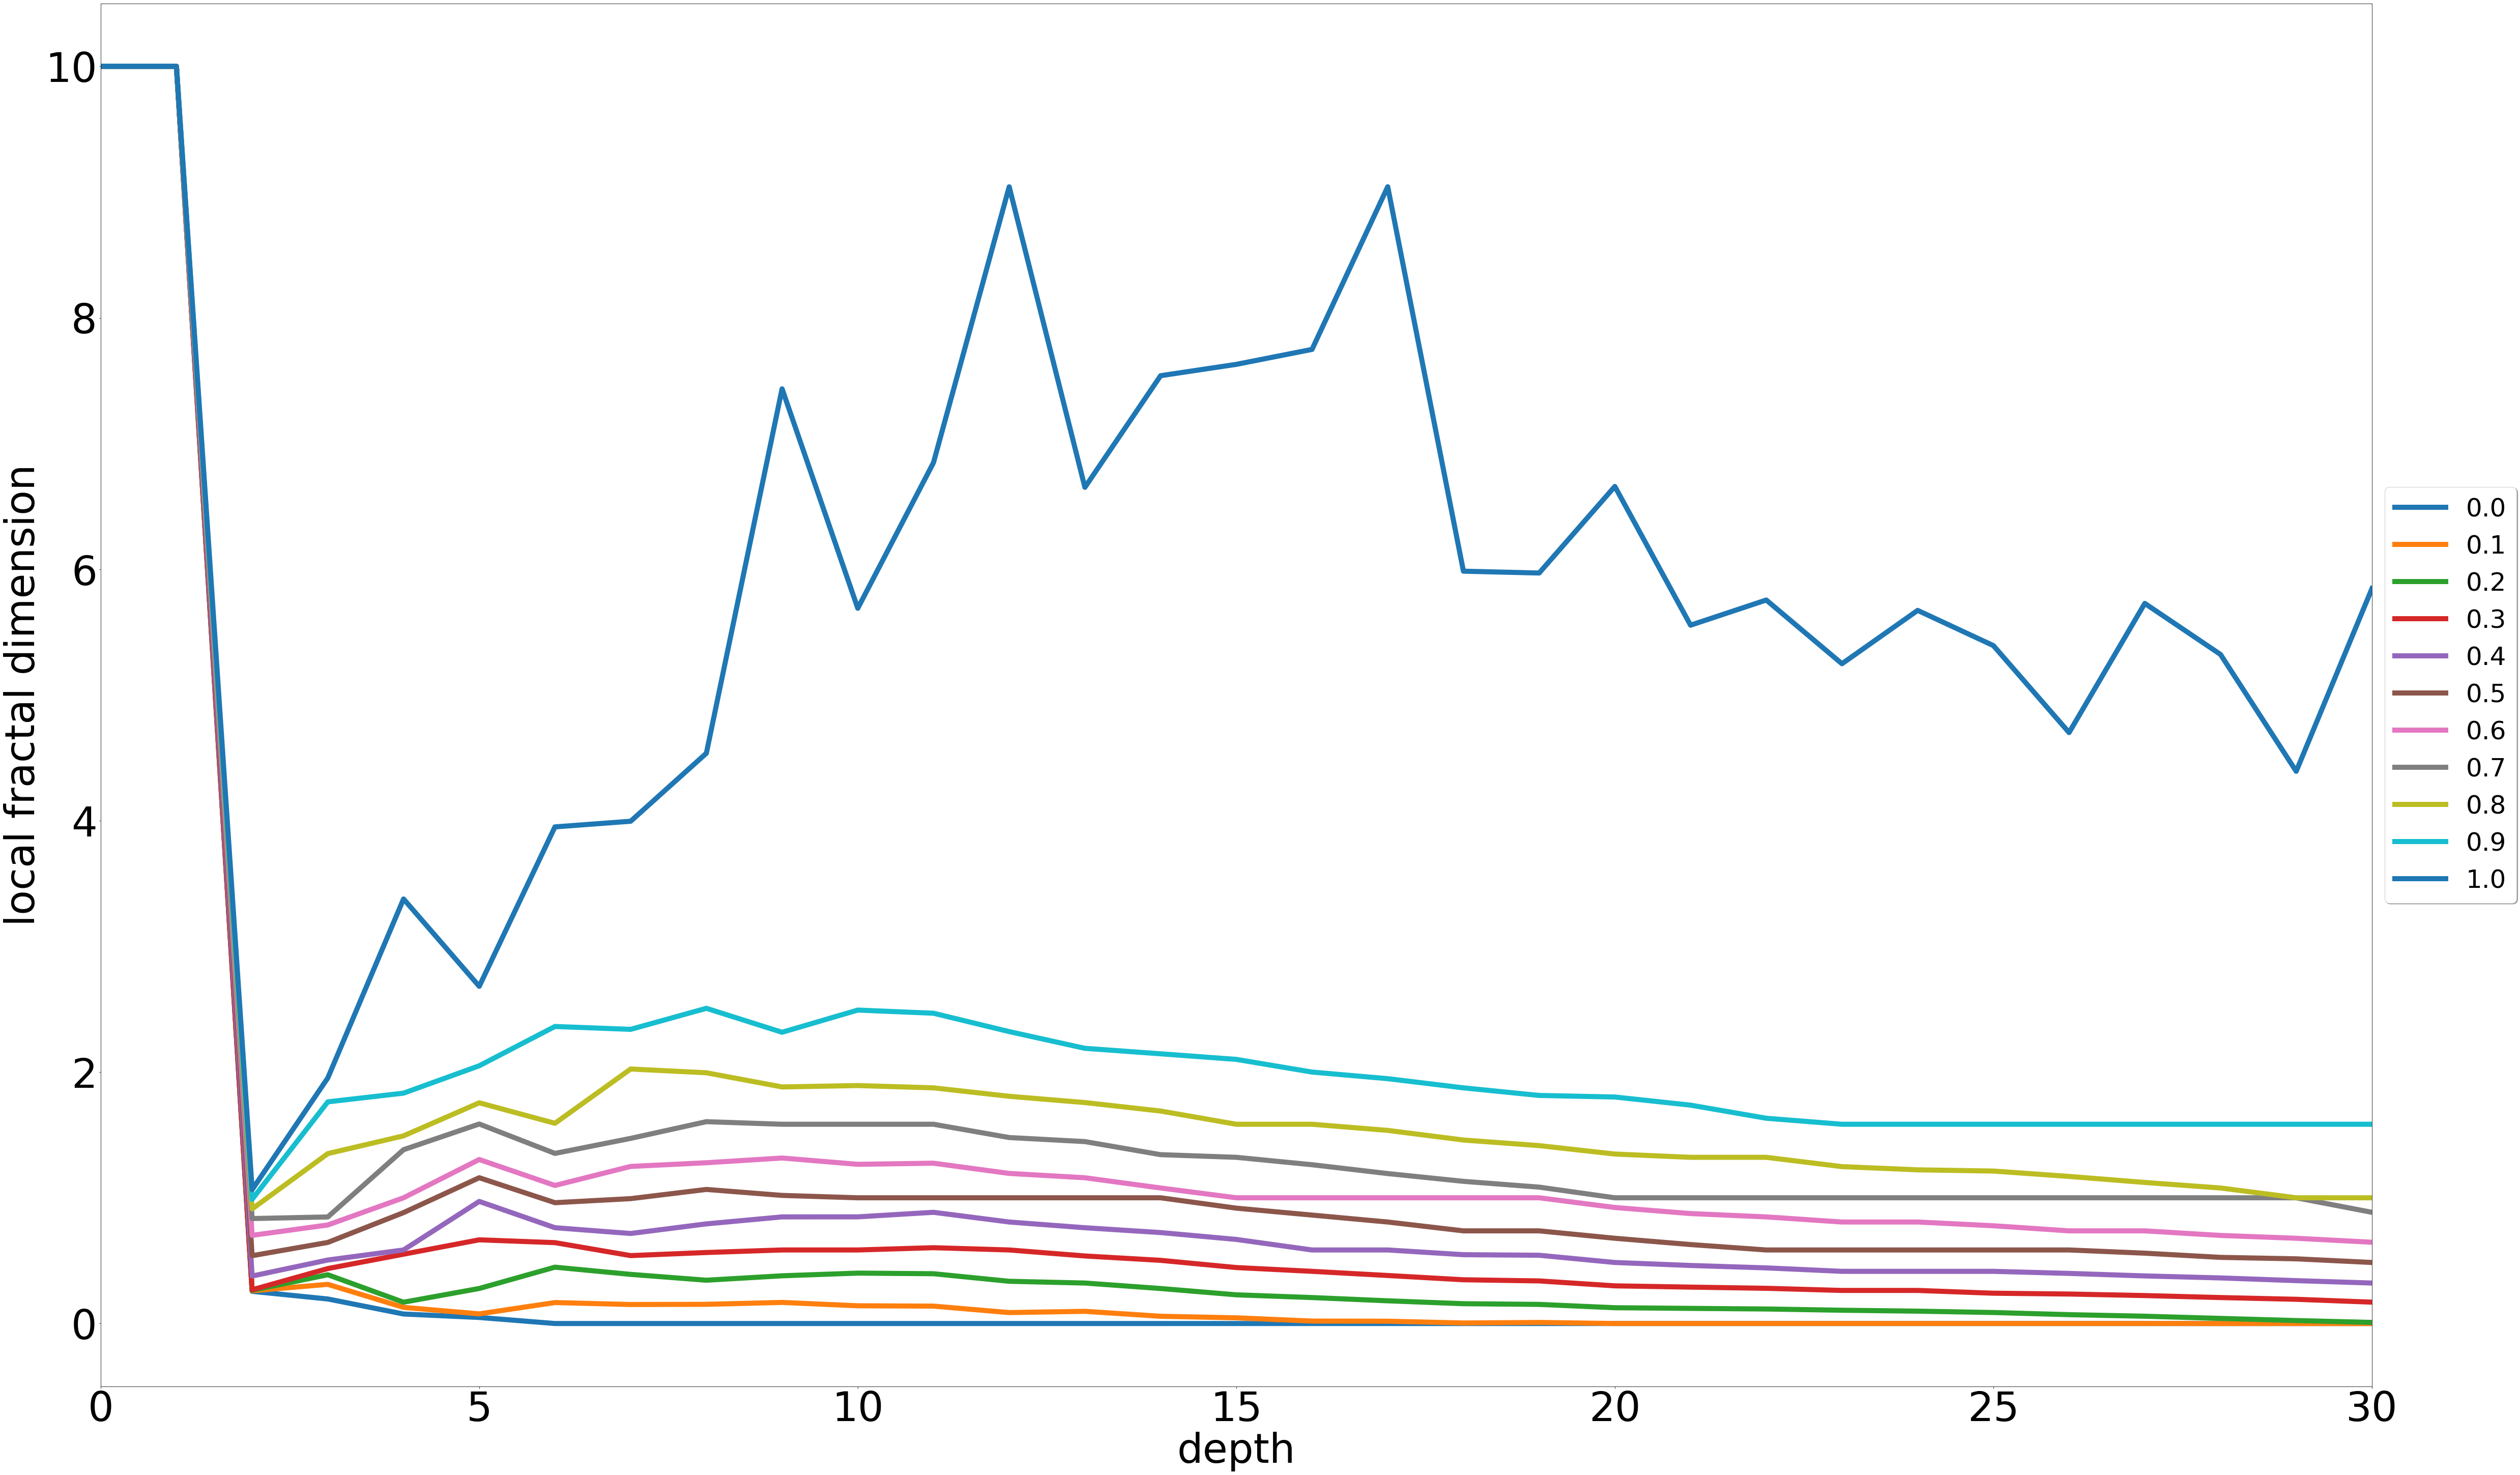

In [47]:
tags = list(map(str, labels))
quantiles_df = pd.DataFrame(quantiles)
quantiles_df['quantiles'] = labels
quantiles_df.set_index('quantiles', inplace=True)
quantiles_df_transpose = quantiles_df.T
fig, ax = plt.subplots()
my_plt = quantiles_df_transpose.plot(figsize=(100, 50), ax=ax, linewidth=10)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size':50},
          fancybox=True, shadow=True)
ax.tick_params(axis='both', which='major', labelsize=80)
plt.xticks(list(range(0, max_depth + 1, 5)))
ax.set_ylim([-0.5, 10.5])
plt.yticks([i for i in range(0, 11, 2)])
plt.xlabel('depth', fontsize=80)
plt.ylabel('local fractal dimension', fontsize=80)
plt.show()
my_plt.get_figure().savefig(f'plots/lfd_vs_depth_{dataset}_{metric}.png')

In [48]:
num_queries = 10

In [69]:
raw_data = pd.read_csv(
    f'logs/search_benchmarks_{dataset}_{metric}.csv',
    dtype={
        'depth': int,
        'radius': np.float64,
        'correctness': bool,
        'false_negative_rate': np.float64,
        'num_hits': int,
        'num_clusters_searched': int,
        'fraction_searched': np.float64,
        'df_calls_made': int,
        'linear_time': np.float64,
        'chess_time': np.float64,
        'speedup_factor': np.float64,
    }
)
raw_data = raw_data[:140]
raw_data.head()

,depth,radius,correctness,false_negative_rate,num_hits,num_clusters_searched,fraction_searched,df_calls_made,linear_time,chess_time,speedup_factor
0,0,0.01,True,0.0,30,1,1.000000,1017383,58.857225,57.068072,1.031
1,5,0.01,True,0.0,30,18,0.985981,1003120,58.857225,56.751071,1.037
2,10,0.01,True,0.0,30,279,0.872862,888035,58.857225,50.158652,1.173
3,15,0.01,True,0.0,30,1474,0.560062,569798,58.857225,33.374076,1.764
4,20,0.01,True,0.0,30,3577,0.167521,170433,58.857225,13.380122,4.399


In [70]:
raw_data.describe()

,depth,radius,false_negative_rate,num_hits,num_clusters_searched,fraction_searched,df_calls_made,linear_time,chess_time,speedup_factor
count,140.000000,140.000000,140.0,140.00000,140.000000,140.000000,1.400000e+02,140.000000,140.000000,140.000000
mean,15.000000,0.015000,0.0,12657.40000,2747.942857,0.592223,6.025173e+05,57.212988,37.015723,2.617036
std,10.035907,0.005018,0.0,21951.29967,3299.852915,0.372926,3.794086e+05,0.506218,18.797138,2.612070
min,0.000000,0.010000,0.0,5.00000,1.000000,0.017272,1.757200e+04,56.681728,3.938127,0.990000
25%,5.000000,0.010000,0.0,245.00000,20.000000,0.227714,2.316720e+05,56.731588,20.329944,1.017750
50%,15.000000,0.015000,0.0,2918.50000,1342.500000,0.621443,6.322455e+05,57.115839,38.949475,1.477000
75%,25.000000,0.020000,0.0,11827.00000,3966.250000,0.985974,1.003113e+06,57.332232,56.273536,2.827750
max,30.000000,0.020000,0.0,92387.00000,11545.000000,1.000000,1.017383e+06,58.857225,57.915423,14.405000


In [71]:
total_linear_time = raw_data.linear_time.sum() / (raw_data.shape[0] / num_queries)
total_chess_time = raw_data.chess_time.sum()
total_time = total_chess_time + total_linear_time
print(f'total time: {total_time:.4f}')

total time: 8042.8506


In [72]:
radii = [0.01, 0.02, 0.05]
# radii = [2000.0, 4000.0]
# radii = [0.0005, 0.001]

In [73]:
data_by_search_radius = {}
for r in radii:
    temp_df = raw_data[raw_data.radius == r]
    temp_df = temp_df.reset_index(drop=True)
    data_by_search_radius[r] = temp_df
data_by_search_radius.keys()

dict_keys([0.01, 0.02, 0.05])

In [74]:
depths = list(range(0, max_depth + 1, 5))
depths

[0, 5, 10, 15, 20, 25, 30]

In [75]:
data_by_search_depth = {}
for d in depths:
    temp_df = raw_data[raw_data.depth == d]
    temp_df = temp_df.reset_index(drop=True)
    data_by_search_depth[d] = temp_df
data_by_search_depth.keys()

dict_keys([0, 5, 10, 15, 20, 25, 30])

In [76]:
x = depths
y1 = []  # comparisons
y2 = []  # speedup
y3 = []  # time
y4 = []  # fraction
ys = []

In [77]:
print(f'depth, df_calls_mu, df_calls_std, time_mu, time_std, fraction_mu, fraction_std, speedup_mu')
for r in radii:
    mos = data_by_search_radius[r].num_hits.mean()
    sos = data_by_search_radius[r].num_hits.std()
    print(f'\nradius: {r}, mean_output_size: {mos:.0f}, std_output_size: {sos:.0f}')
    for depth, df_by_depth in data_by_search_depth.items():
        data_df = df_by_depth[df_by_depth.radius == r]
        
        mean_df_calls = data_df.df_calls_made.mean() / 10_000
        stddev_df_calls = data_df.df_calls_made.std() / 10_000
        y1.append(mean_df_calls)
        
        mean_speedup = data_df.speedup_factor.mean()
        y2.append(mean_speedup)
        
        mean_time = data_df.chess_time.mean()
        stddev_time = data_df.chess_time.std()
        y3.append(mean_time)
        
        mean_fraction = data_df.fraction_searched.mean()
        stddev_fraction = data_df.fraction_searched.std()
        y4.append(mean_fraction)
        
        if not depth in depths:
            continue
        print(f'{depth} & {mean_df_calls:.2f} & {stddev_df_calls:.2f} & {mean_time:.2f} & '
              f'{stddev_time:.2f} & {mean_fraction:.2f} & {stddev_fraction:.2f} & '
              f'{mean_speedup:.2f}\\\\')
    ys.append((y1.copy(), y2.copy(), y3.copy(), y4.copy()))
    y1, y2, y3, y4 = [], [], [], []

depth, df_calls_mu, df_calls_std, time_mu, time_std, fraction_mu, fraction_std, speedup_mu

radius: 0.01, mean_output_size: 4919, std_output_size: 12164
0 & 101.74 & 0.00 & 56.94 & 0.17 & 1.00 & 0.00 & 1.00\\
5 & 100.31 & 0.00 & 56.26 & 0.24 & 0.99 & 0.00 & 1.02\\
10 & 91.04 & 4.39 & 51.22 & 2.52 & 0.89 & 0.04 & 1.12\\
15 & 52.66 & 9.83 & 30.68 & 5.61 & 0.52 & 0.10 & 1.94\\
20 & 18.08 & 6.16 & 13.52 & 3.80 & 0.18 & 0.06 & 4.61\\
25 & 5.85 & 3.16 & 8.34 & 2.49 & 0.06 & 0.03 & 7.56\\
30 & 3.72 & 2.69 & 7.54 & 2.19 & 0.04 & 0.03 & 8.25\\

radius: 0.02, mean_output_size: 20396, std_output_size: 26481
0 & 101.74 & 0.00 & 57.48 & 0.42 & 1.00 & 0.00 & 1.00\\
5 & 100.52 & 0.18 & 56.72 & 0.34 & 0.99 & 0.00 & 1.01\\
10 & 97.26 & 2.45 & 55.16 & 1.47 & 0.96 & 0.02 & 1.04\\
15 & 72.00 & 5.63 & 42.53 & 3.31 & 0.71 & 0.06 & 1.35\\
20 & 42.37 & 10.63 & 30.13 & 6.46 & 0.42 & 0.10 & 1.99\\
25 & 29.22 & 10.93 & 26.17 & 6.89 & 0.29 & 0.11 & 2.34\\
30 & 27.03 & 11.02 & 25.54 & 7.15 & 0.27 & 0.11 & 2.42\\



In [78]:
np.shape(ys[0][0])

(7,)

<Figure size 432x288 with 0 Axes>

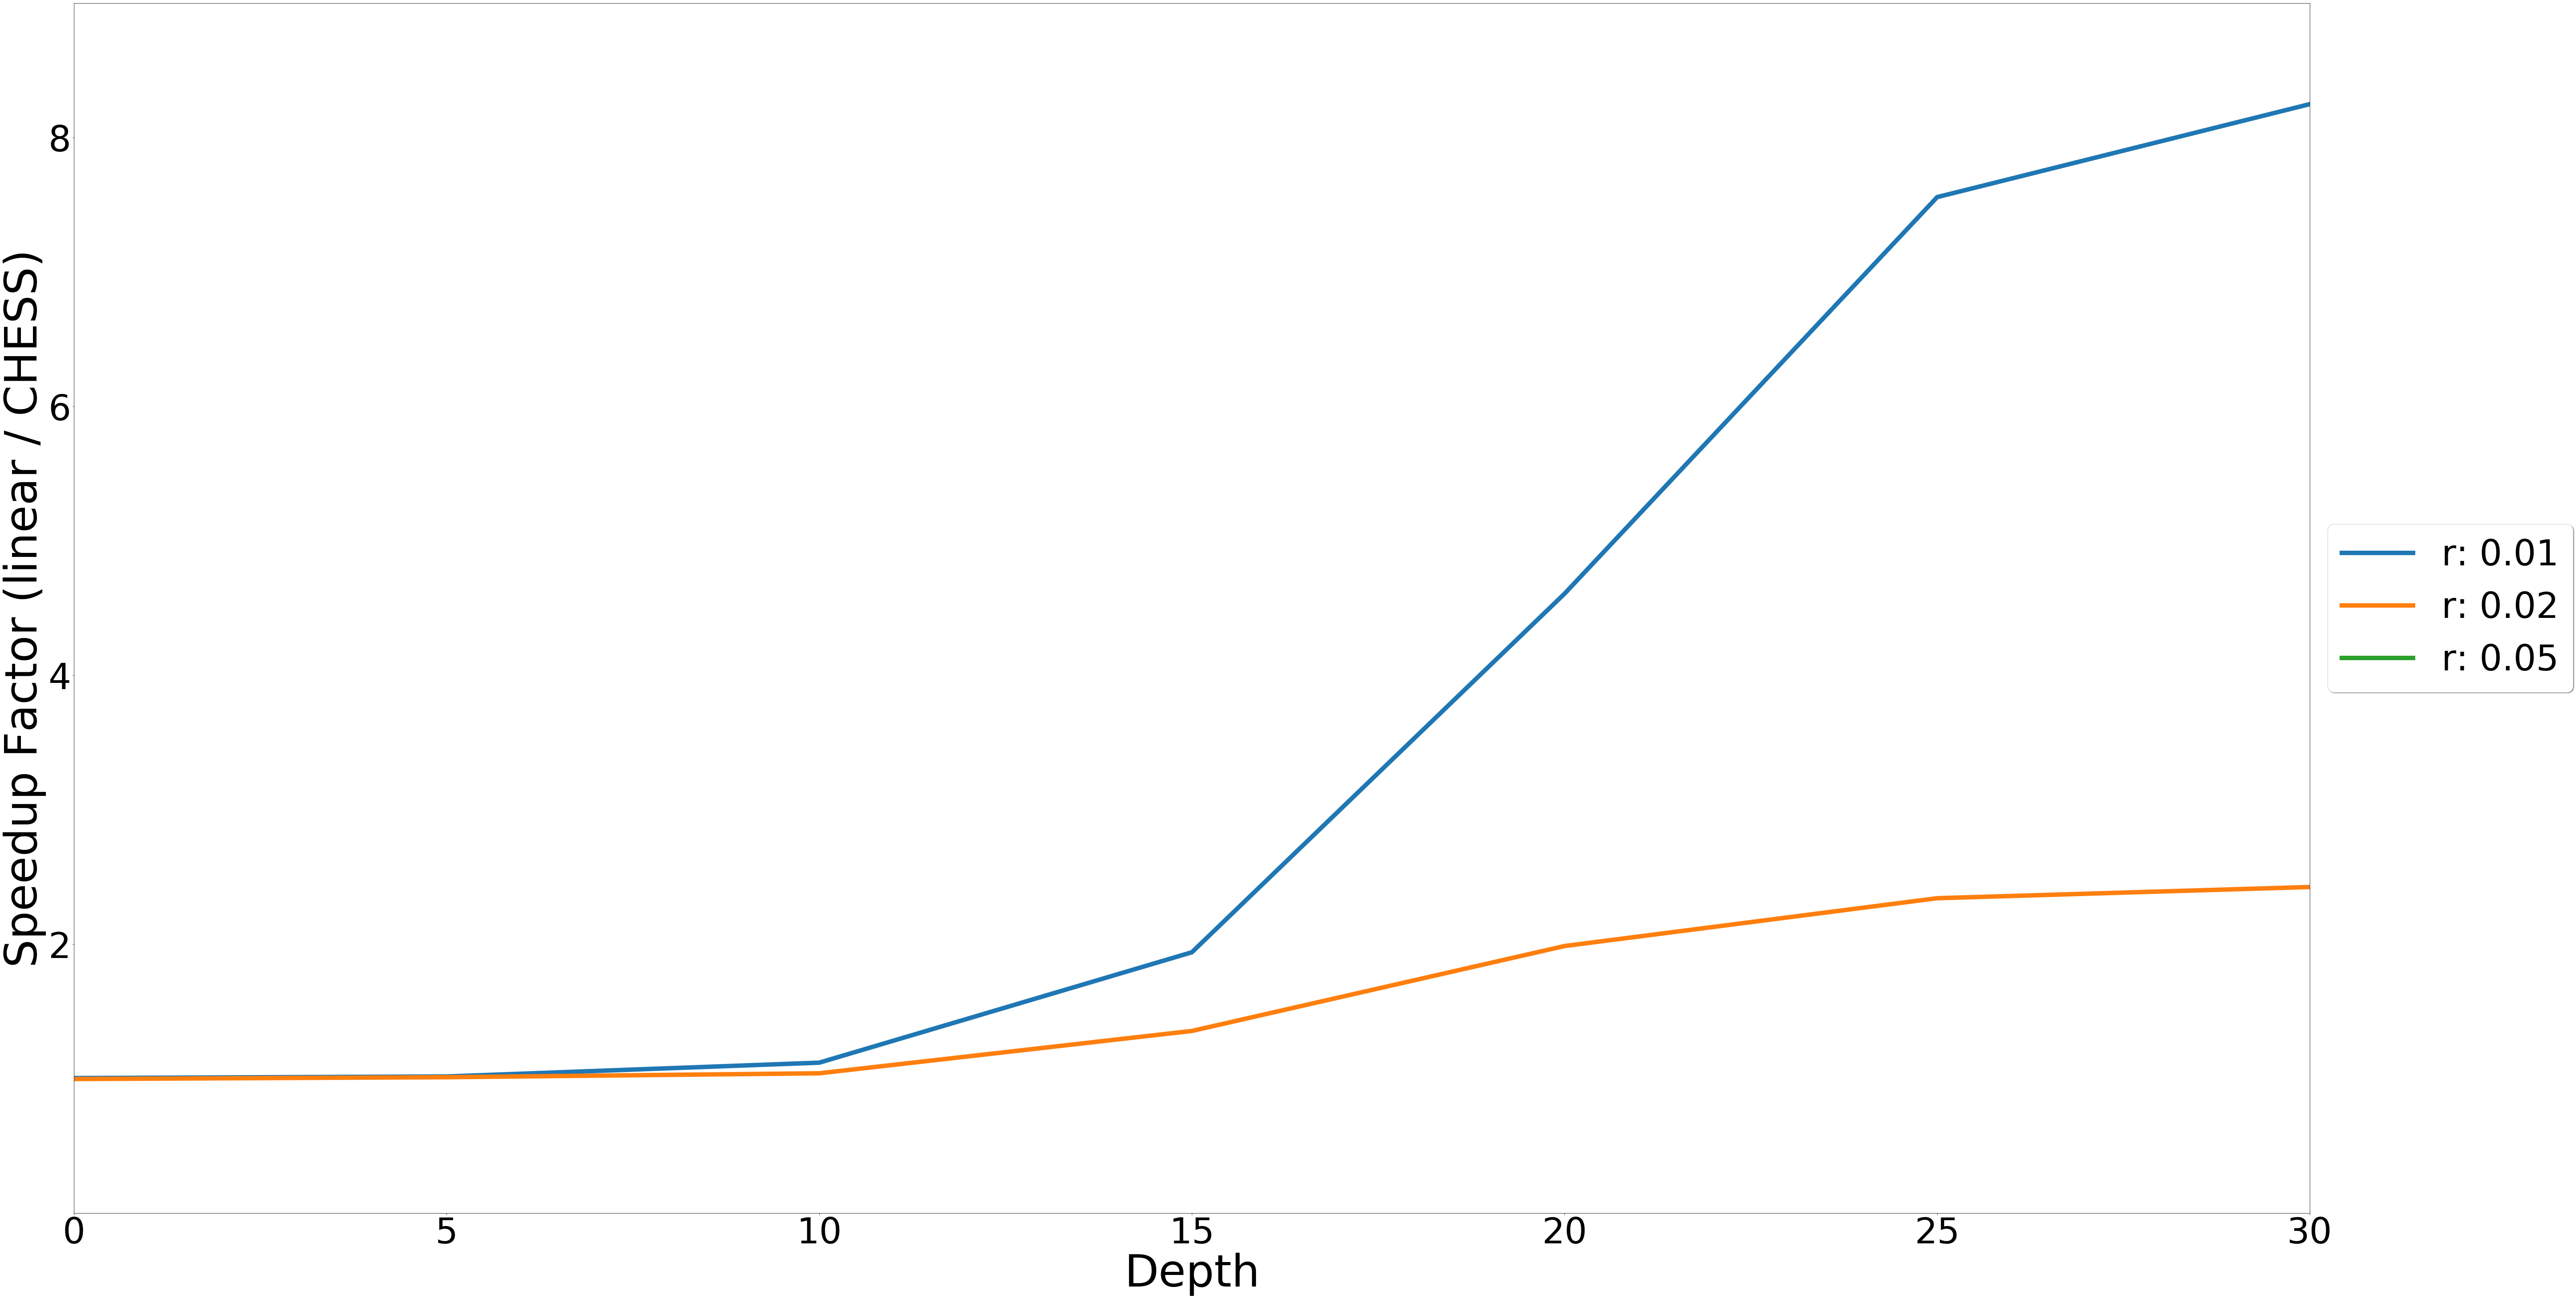

In [79]:
plt.clf()
fig = plt.figure(figsize=(100, 50))
ax = fig.add_subplot(1, 1, 1)
for i in range(len(radii)):
    plt.plot(x, ys[i][1], label=f'r: {str(radii[i])}', linewidth=10)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size':80}, fancybox=True, shadow=True)
ax.tick_params(axis='both', which='major', labelsize=80)
ax.set_xlim([0, max_depth])
plt.xticks([i for i in range(0, max_depth + 1, 5)])
ax.set_ylim([0, 9])
plt.yticks([i for i in range(2, 9, 2)])
plt.xlabel('Depth', fontsize=100)
plt.ylabel('Speedup Factor (linear / CHESS)', fontsize=100)
plt.show()
fig.savefig(f'plots/speedup_factor_{dataset}_{metric}.png')

<Figure size 432x288 with 0 Axes>

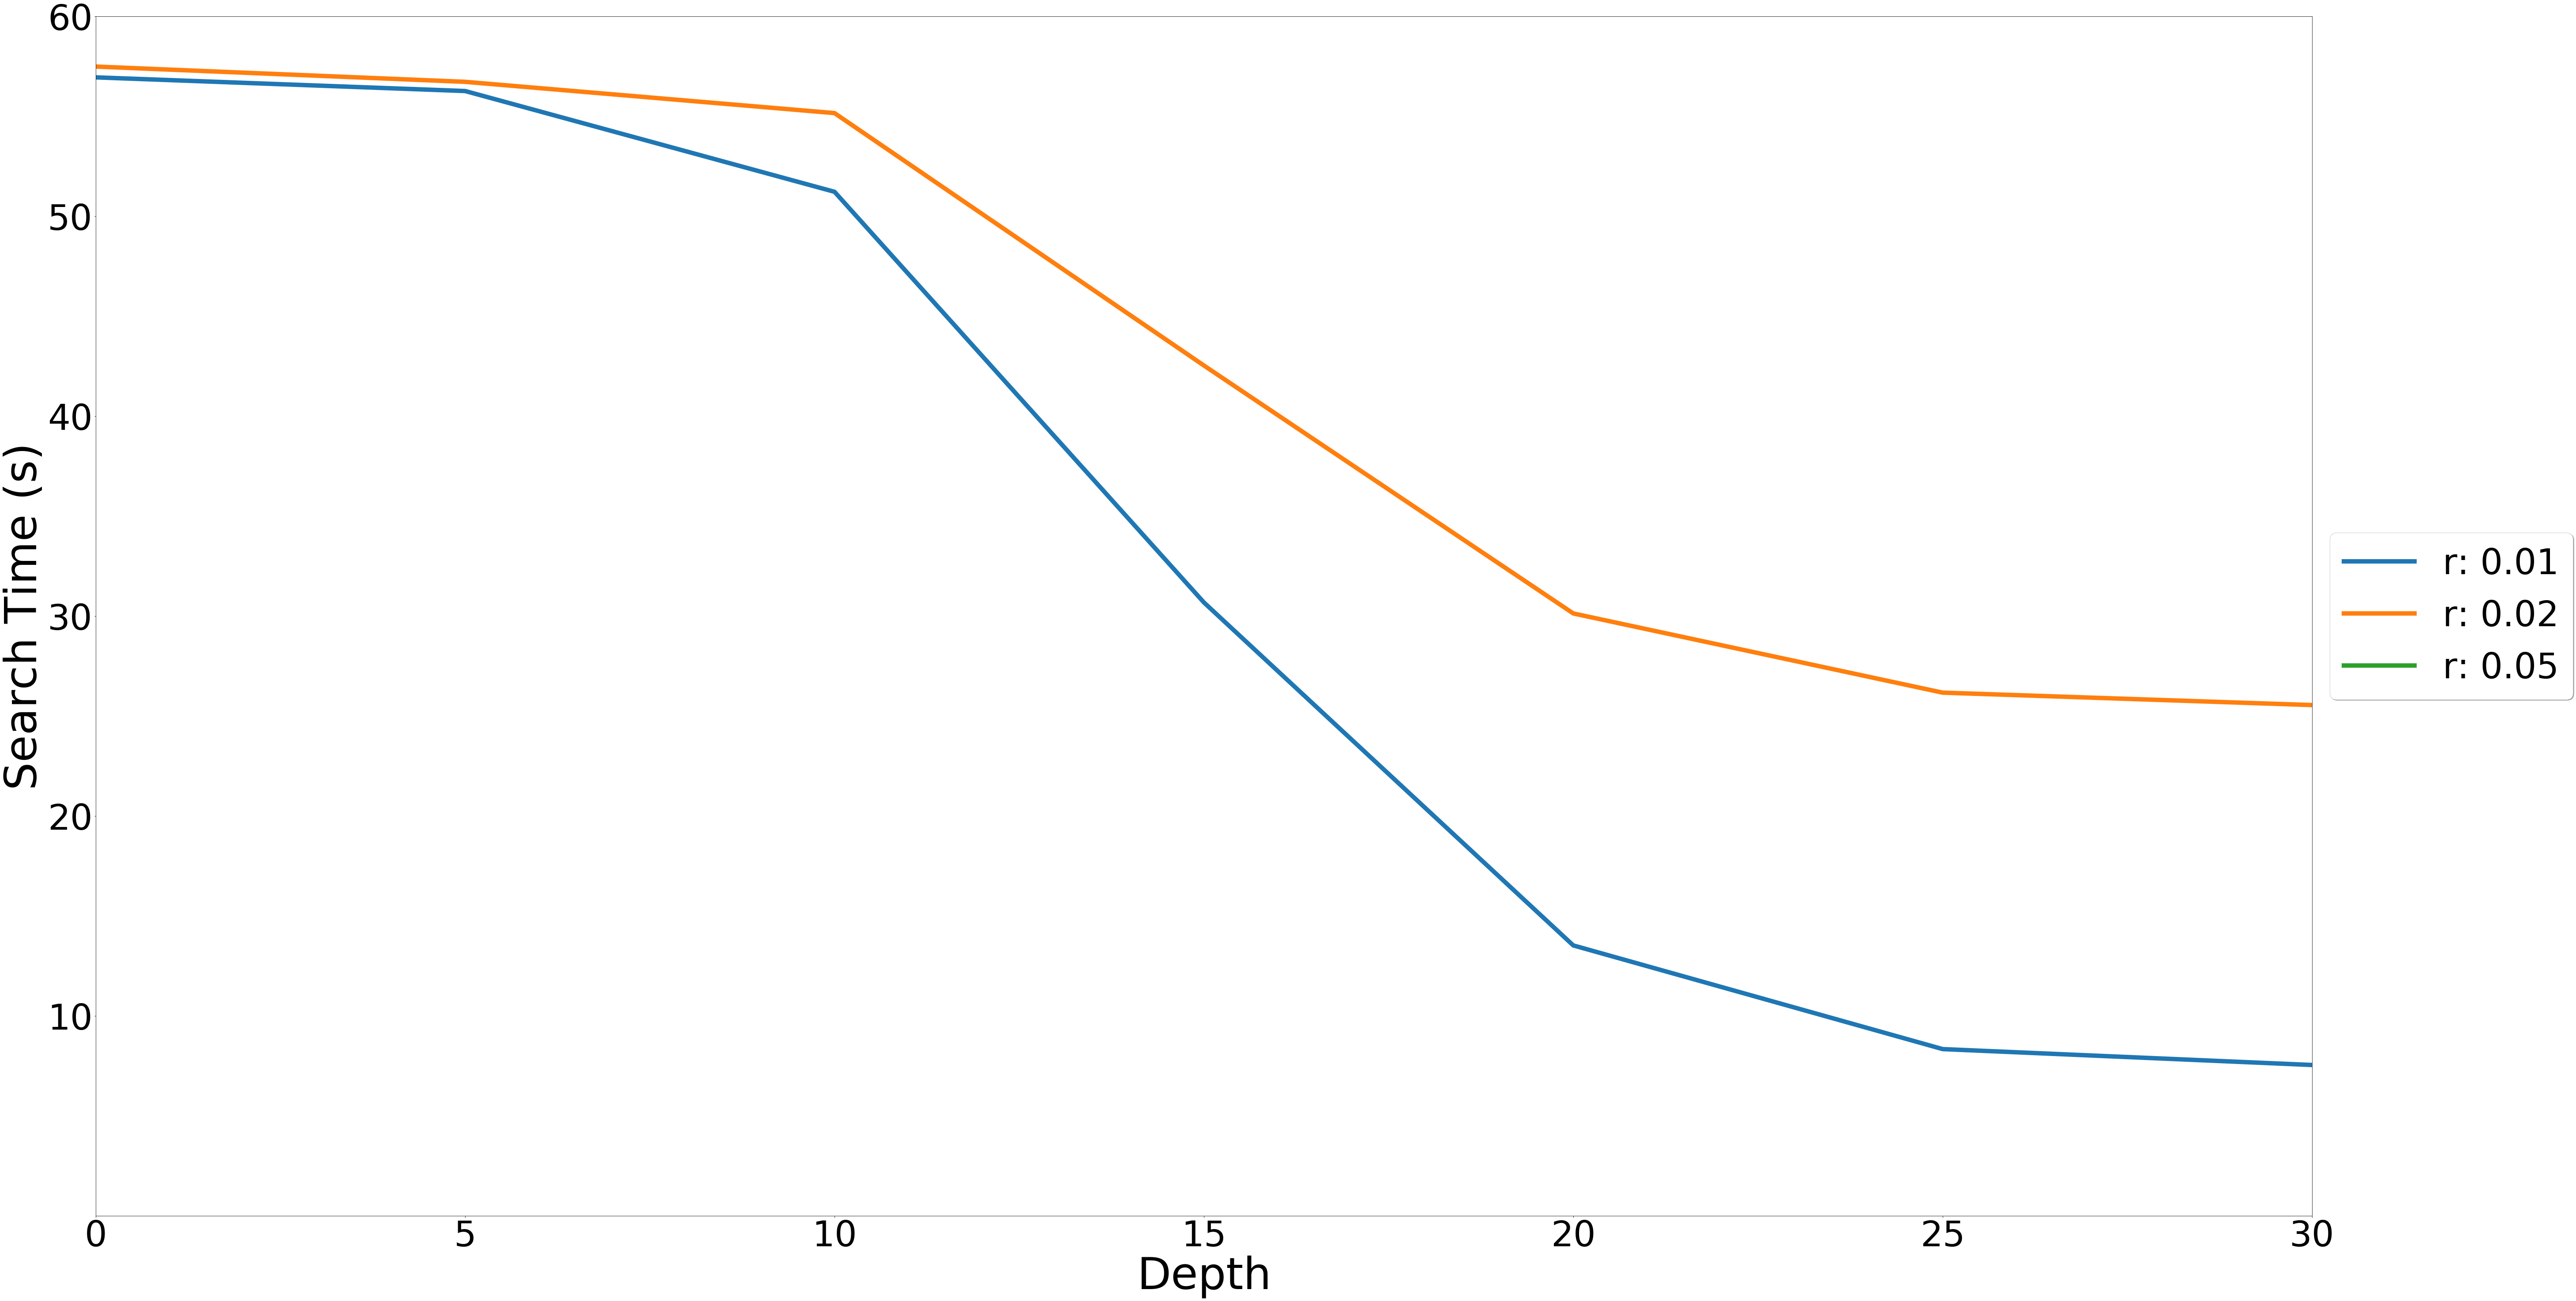

In [80]:
plt.clf()
fig = plt.figure(figsize=(100, 50))
ax = fig.add_subplot(1, 1, 1)
for i in range(len(radii)):
    plt.plot(x, ys[i][2], label=f'r: {str(radii[i])}', linewidth=10)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size':80}, fancybox=True, shadow=True)
ax.tick_params(axis='both', which='major', labelsize=80)
ax.set_xlim([0, max_depth])
plt.xticks([i for i in range(0, max_depth + 1, 5)])
ax.set_ylim([0, 60])
plt.yticks([i for i in range(10, 61, 10)])
plt.xlabel('Depth', fontsize=100)
plt.ylabel('Search Time (s)', fontsize=100)
plt.show()
fig.savefig(f'plots/search_time_{dataset}_{metric}.png')